<a href="https://colab.research.google.com/github/farazjawedd/Explainable-AI/blob/main/xAI_Assignment_2_Interpretable_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial setup

In [2]:
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 45.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


Loading libraries and reading the dataset

In [5]:
%pwd


'/content'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from pygam import GAM, s, f

# Load the dataset
df = pd.read_csv('/content/telco.csv')

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA

Initial data exploration:
- Data type of the columns
- Some descriptive statistics of the columns
- Proportion of the churn column - to check the balance of the outcome variable

In [9]:
print(df.info())
print(df.describe())
print(df['Churn'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Checking for missing values

In [10]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Plots of a few columns

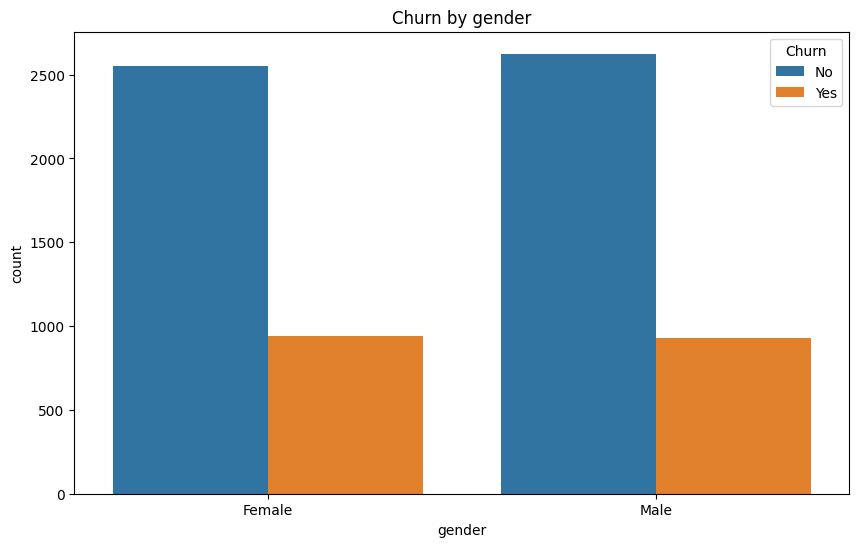

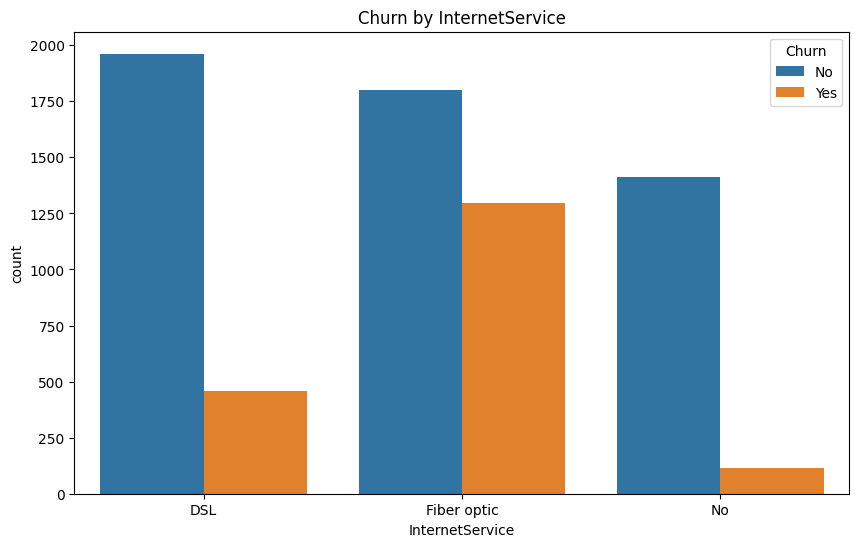

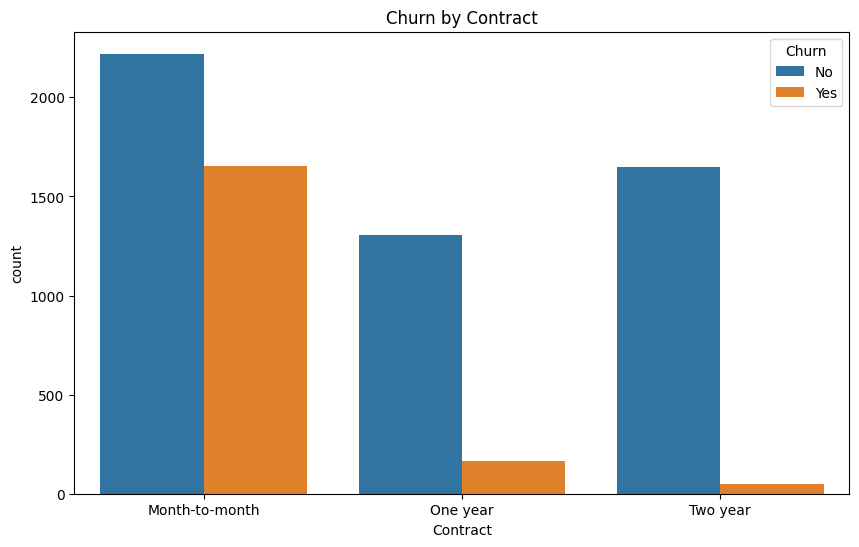

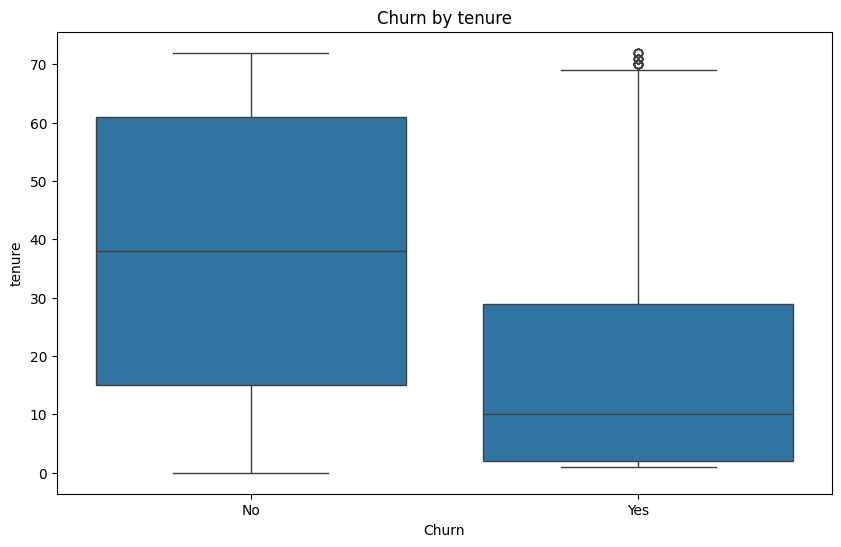

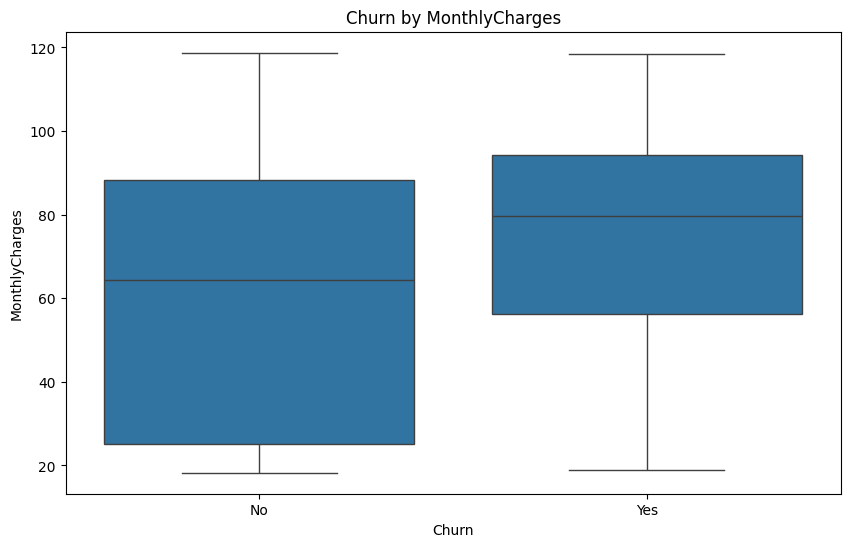

In [11]:
# Categorical features
cat_features = ['gender', 'InternetService', 'Contract']
for feature in cat_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn by {feature}')
    plt.show()

# Numerical features
num_features = ['tenure', 'MonthlyCharges']
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'Churn by {feature}')
    plt.show()

How are the tenure and Monthly Charges features co-related? Just checking

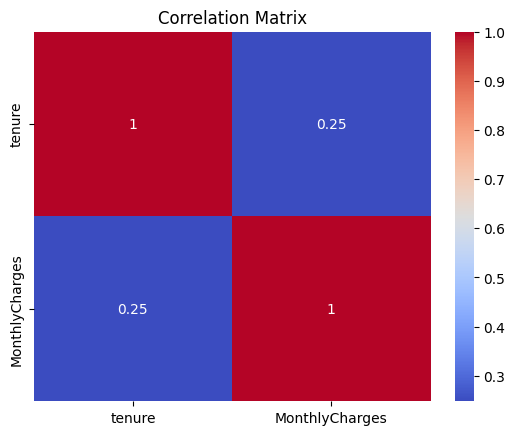

In [12]:
correlation_matrix = df[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Linear Regression

In [14]:
data = df

In [16]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes



Linear Regression Results:
Mean Squared Error: 0.2227
R-squared: -0.1440
Cross-validation R-squared: -0.2737 (+/- 0.9854)


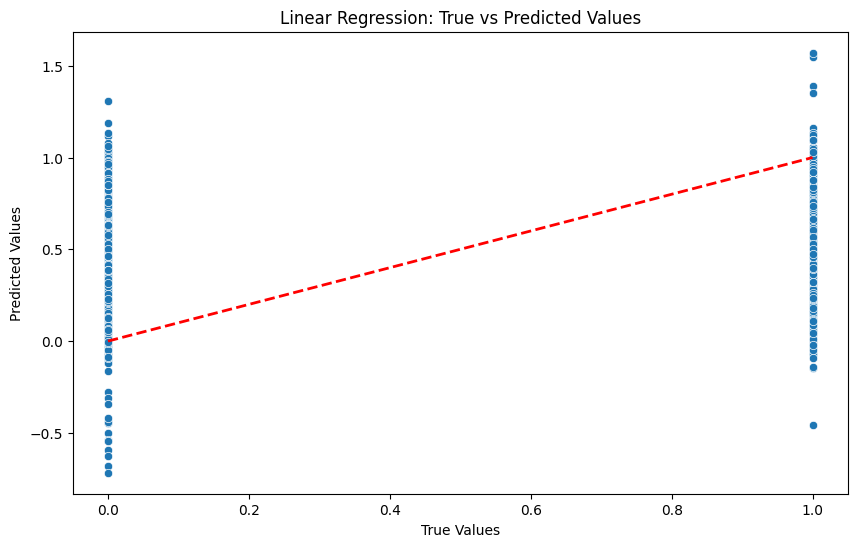


Ridge Regression Results:
Mean Squared Error: 0.1934
R-squared: 0.0063
Cross-validation R-squared: -0.0407 (+/- 0.2804)


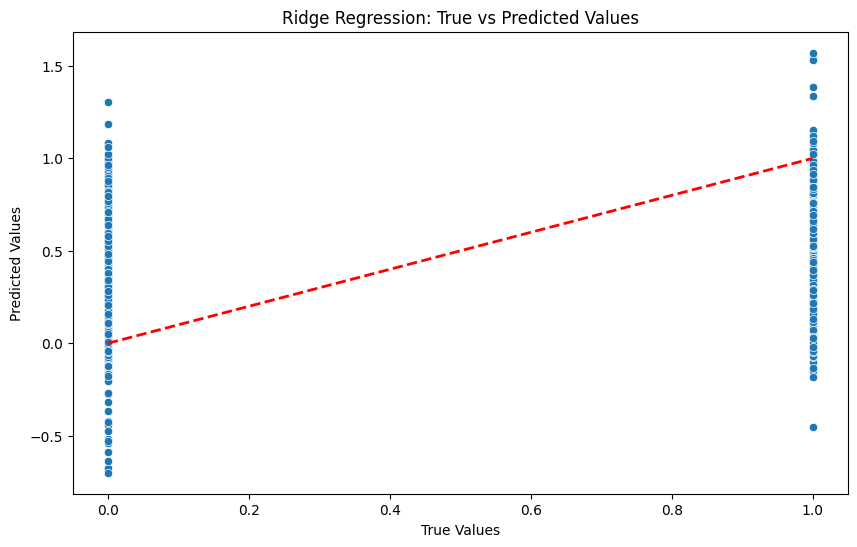


Lasso Regression Results:
Mean Squared Error: 0.1946
R-squared: -0.0000
Cross-validation R-squared: -0.0015 (+/- 0.0015)


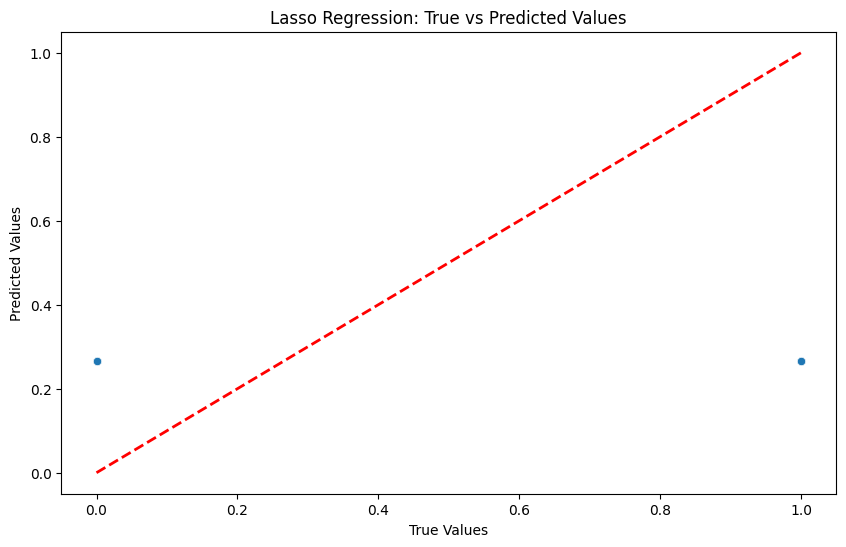


Top 10 most important features:
                                Coefficient  Abs_Coefficient
InternetService_Fiber optic        0.125577         0.125577
DeviceProtection_Yes              -0.101621         0.101621
OnlineBackup_Yes                  -0.090708         0.090708
tenure                             0.072711         0.072711
MonthlyCharges                     0.060748         0.060748
TechSupport_Yes                   -0.059535         0.059535
StreamingMovies_Yes                0.055036         0.055036
PaymentMethod_Electronic check     0.050698         0.050698
PaperlessBilling_Yes               0.045912         0.045912
Partner_Yes                       -0.039867         0.039867


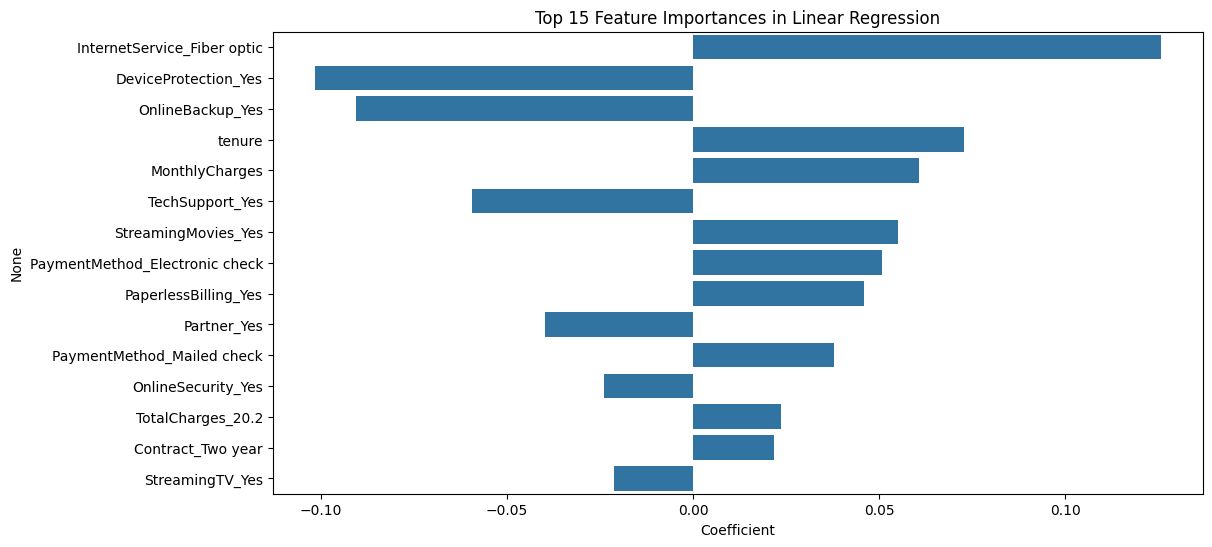

In [17]:
# Importing libraries for Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Preprocess the data
# Convert the 'Churn' column to numerical (0 for staying, 1 for churning)
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Drop 'customerID' as it is not a useful feature
data = data.drop('customerID', axis=1)

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Split the data into features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and compare different linear models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0)
}

for name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

    print(f"\n{name} Results:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print(f"Cross-validation R-squared: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Plot the true vs predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{name}: True vs Predicted Values')
    plt.show()

# Interpret the coefficients for Linear Regression
lr_model = models['Linear Regression']
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 most important features:")
print(coefficients.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y=coefficients.index[:15], data=coefficients.head(15))
plt.title('Top 15 Feature Importances in Linear Regression')
plt.show()


# Logistic Regression


Logistic Regression Results:
Accuracy: 0.7842
Cross-validation Accuracy: 0.7579 (+/- 0.0299)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1036
           1       0.61      0.51      0.56       373

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



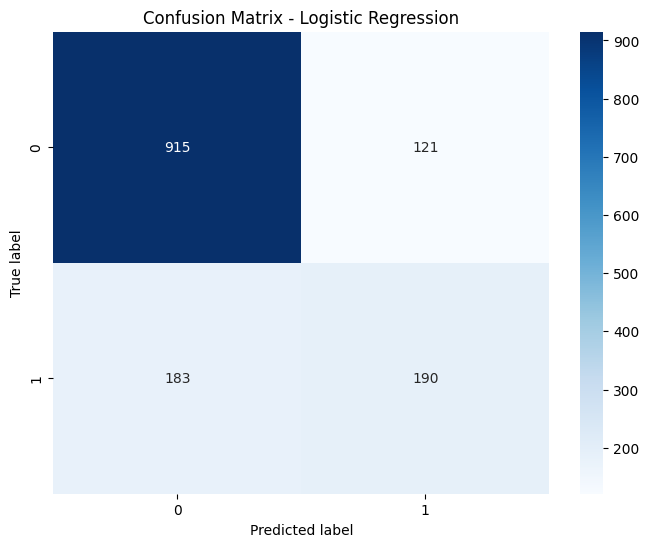

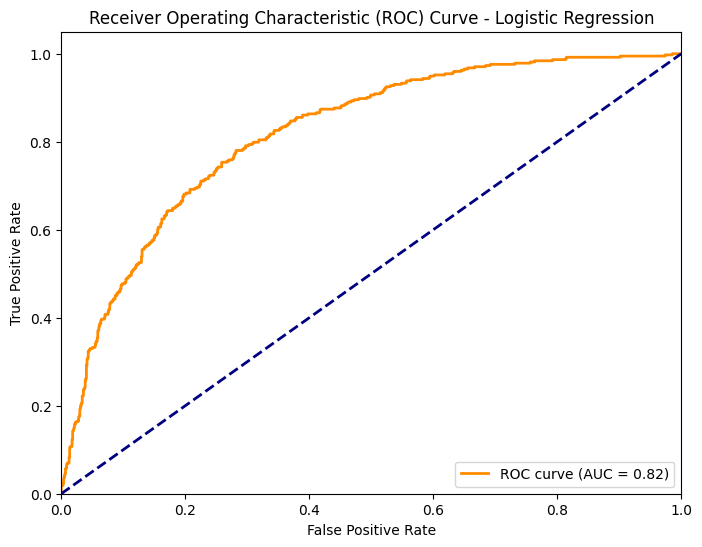


L1 Regularized Results:
Accuracy: 0.7991
Cross-validation Accuracy: 0.7868 (+/- 0.0095)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



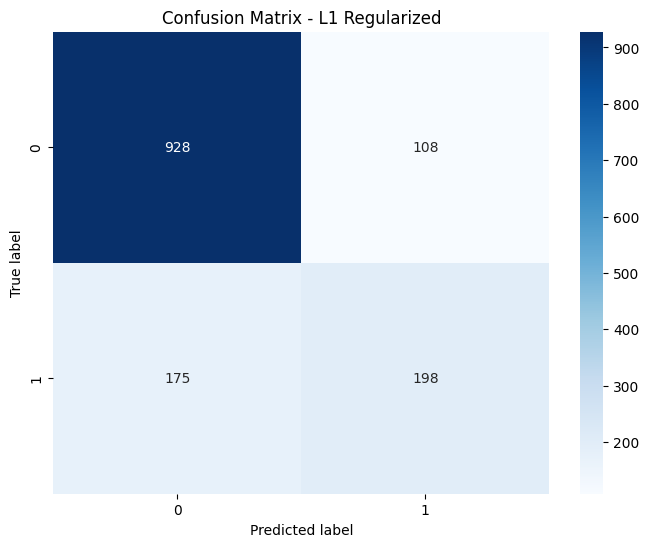

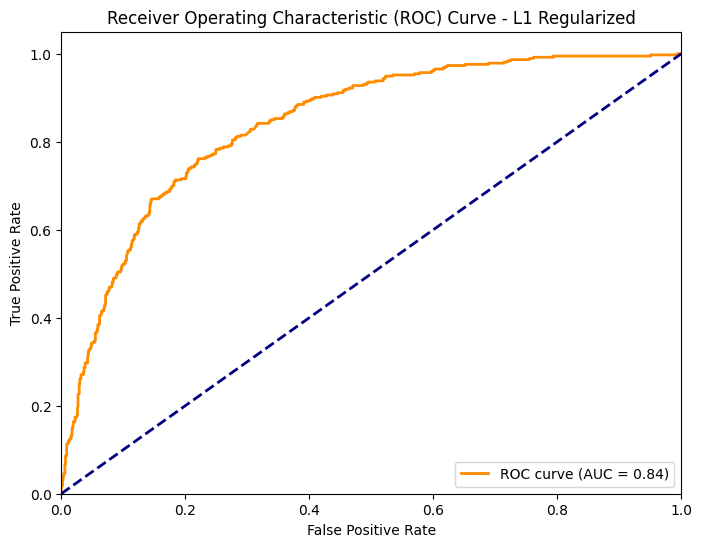


L2 Regularized Results:
Accuracy: 0.7842
Cross-validation Accuracy: 0.7579 (+/- 0.0299)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1036
           1       0.61      0.51      0.56       373

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



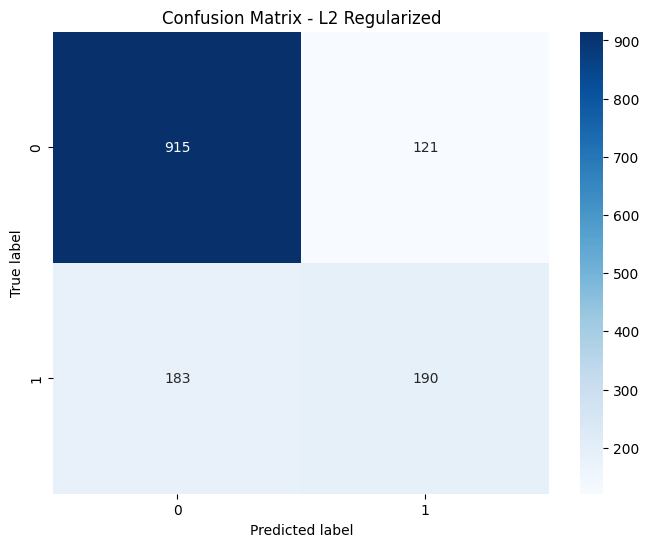

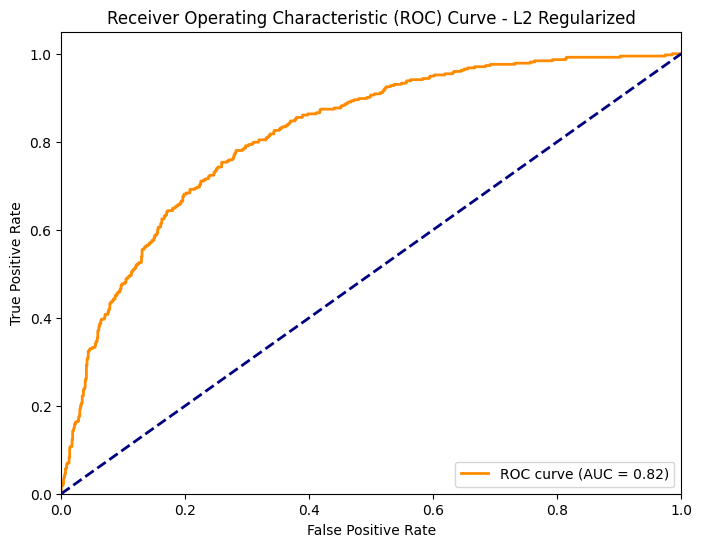

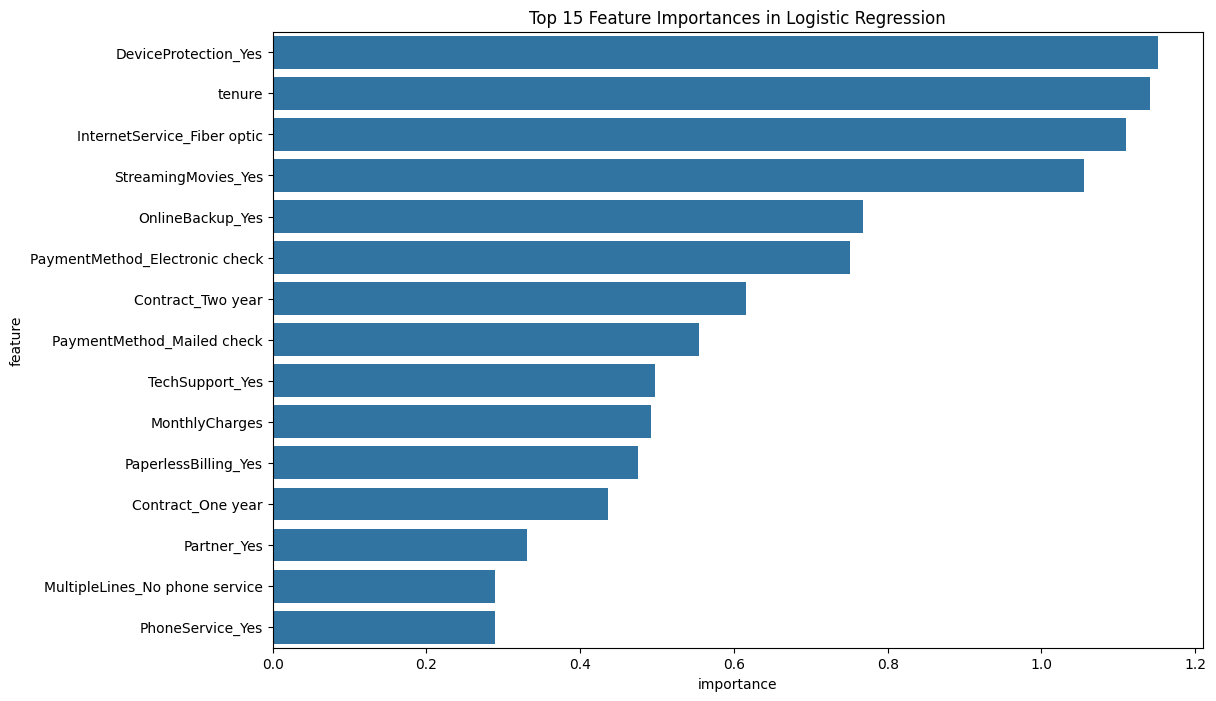

In [18]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import RFE


# Define logistic regression models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'L1 Regularized': LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    'L2 Regularized': LogisticRegression(penalty='l2', random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    # Plot ROC curve
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()

# Feature importance for the base Logistic Regression model
base_model = models['Logistic Regression']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(base_model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importances in Logistic Regression')
plt.show()

# Generalized Additive Model (GAM)

In [20]:
data

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,0,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,1,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,45,42.30,0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,1,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,True,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
7039,0,72,103.20,0,False,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
7040,0,11,29.60,0,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7041,1,4,74.40,1,True,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     56.1737
Link Function:                        LogitLink Log Likelihood:                                 -2276.6879
Number of Samples:                         5634 AIC:                                             4665.7232
                                                AICc:                                            4666.9162
                                                UBRE:                                               2.8361
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3018
Feature Function                  Lam

<ipython-input-22-0f28aad2ed7a>:52: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


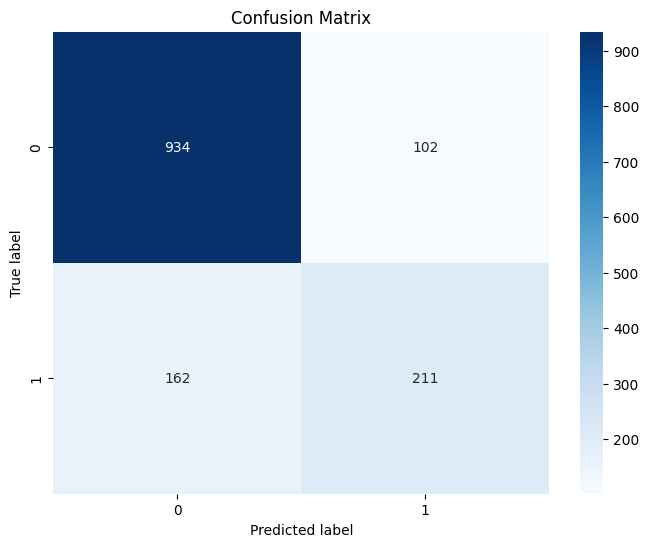

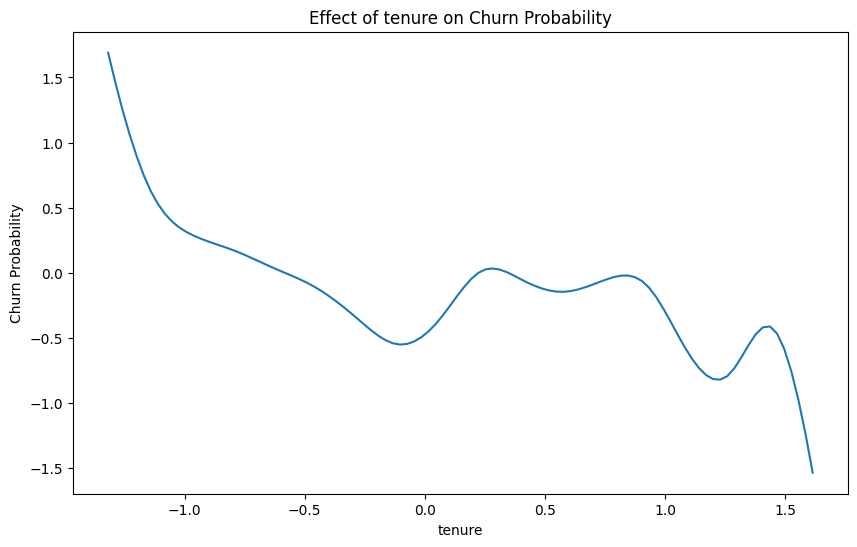

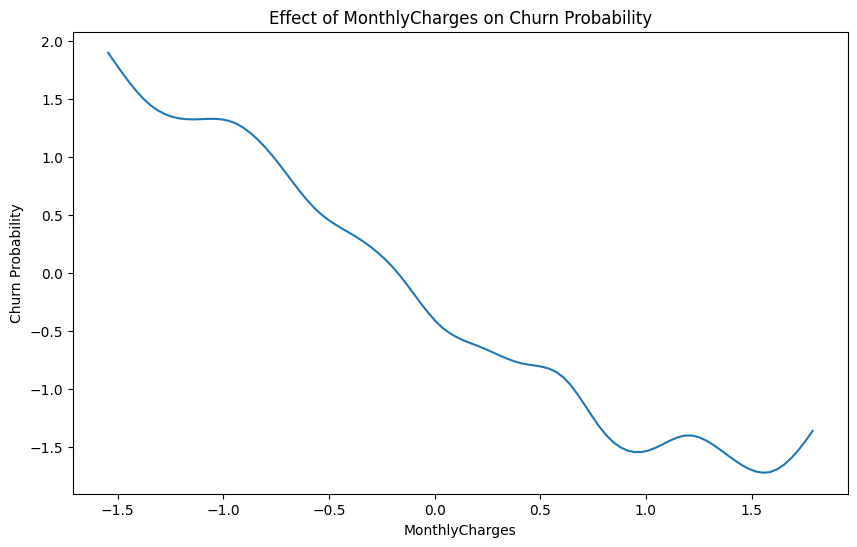

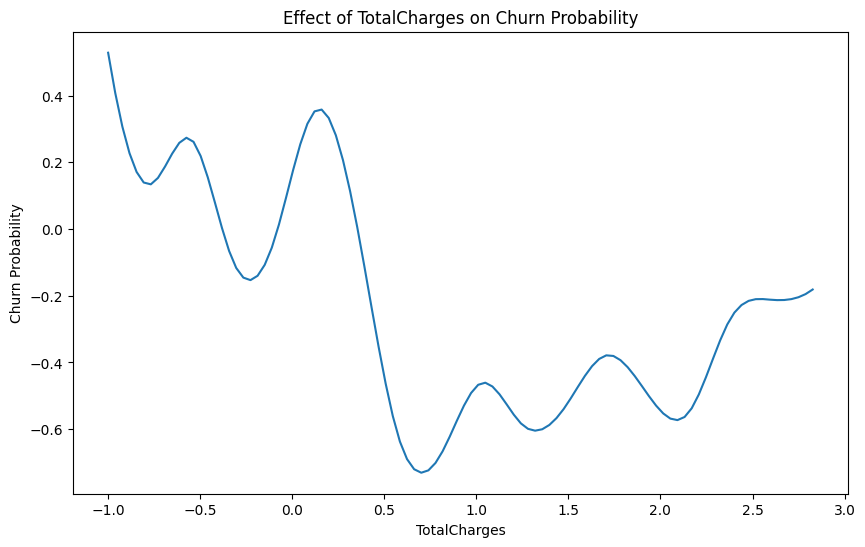

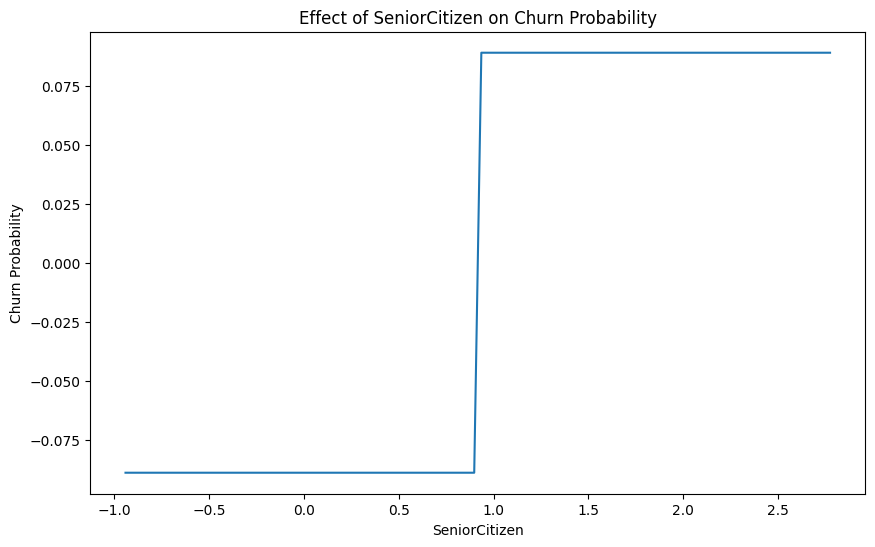

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from pygam import LogisticGAM, s, f
import seaborn as sns
# Load the dataset again from fresh
data = pd.read_csv('/content/telco.csv')

# Convert 'TotalCharges' to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.fillna({'TotalCharges': data['TotalCharges'].median()}, inplace=True)

# Drop customerID as it's not useful for modeling
data.drop(columns=['customerID'], inplace=True)
# Encode categorical variables using one-hot encoding
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

data[categorical_cols] = data[categorical_cols].astype(str)
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(data[categorical_cols])
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate encoded features with numerical features
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
X = pd.concat([data[numerical_cols], encoded_cat_df], axis=1)

# Target variable encoding (Churn: Yes = 1, No = 0)
y = data['Churn'].map({'Yes': 1, 'No': 0})

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define GAM with splines for numerical features and factor for categorical
terms = s(0) + s(1) + s(2) + f(3)
for i in range(4, X.shape[1]):
    terms += f(i)

# Train the model
gam = LogisticGAM(terms).fit(X_train, y_train)

# Model summary
print(gam.summary())

# Evaluate the model on test data
y_pred_probs = gam.predict_proba(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Performance evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'AUC-ROC: {roc_auc_score(y_test, y_pred_probs):.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Plot partial dependence for numerical features
for i, feature in enumerate(numerical_cols):
    plt.figure(figsize=(10, 6))
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.title(f'Effect of {feature} on Churn Probability')
    plt.xlabel(feature)
    plt.ylabel('Churn Probability')
    plt.show()




## Conclusion and Model Comparison

### Model Performance Metrics

| Model | Accuracy | Precision | Recall | F1-Score | Additional Metrics |
|-------|----------|-----------|--------|----------|-------------------|
| Linear Regression | -0.1440 (R-squared) | - | - | - | Mean Squared Error: 0.2227 |
| Logistic Regression | 0.7842 | 0.61 | 0.51 | 0.56 | - |
| Generalized Additive Model (GAM) | 0.8126 | - | - | - | Pseudo R-squared: 30.18% |

### Key Findings

#### Model Strengths and Weaknesses

**Linear Regression**:
- **Strengths**:
  - Easy to interpret coefficients
  - Provides baseline understanding of feature relationships
- **Weaknesses**:
  - Low predictive power (R-squared: -0.1440)
  - Not suitable for binary classification

**Logistic Regression**:
- **Strengths**:
  - Good overall accuracy (78%)
  - Interpretable odds ratios
- **Weaknesses**:
  - Moderate precision (61%)
  - Limited recall (51%)

**Generalized Additive Model (GAM)**:
- **Strengths**:
  - Highest accuracy (81%)
  - Captures non-linear relationships
  - Provides visual insights into feature effects
- **Weaknesses**:
  - More complex to implement and interpret


### Recommendations for Telecommunications Company

1. **Primary Model Recommendation**: Generalized Additive Model (GAM)
   - Best captures complex, non-linear relationships in customer churn
   - Provides most nuanced understanding of churn factors

2. **Complementary Approach**:
   - Use Logistic Regression for quick, interpretable results
   - Compare insights from both GAM and Logistic Regression

3. **Key Focus Areas**:
   - **Contract Type**: Month-to-month contracts highest churn risk
   - **Customer Tenure**: Longer tenure correlates with lower churn
   - **Service Characteristics**:
     - Fiber optic internet associated with higher churn
     - Monthly charges show non-linear impact on churn probability

4. **Strategic Interventions**:
   - Develop targeted retention strategies for month-to-month customers
   - Create loyalty programs to increase customer tenure
   - Review pricing and service packages, especially for fiber optic services
   - Implement personalized customer engagement based on GAM insights

5. **Continuous Improvement**:
   - Regularly retrain and validate models
   - Explore additional features and advanced machine learning techniques
   - Monitor key performance indicators (accuracy, precision, recall)

### Final Insight

The multi-model approach provides a comprehensive understanding of customer churn, with the GAM offering the most sophisticated analysis of complex customer behavior patterns. All in all, top 3 things to consider are device protection, tenure and fibre optic connection.

